In [1]:

%pprint
import sys
sys.path.insert(1, osp.join(os.pardir, 'py'))

Pretty printing has been turned OFF


In [2]:

import os.path as osp
shared_folder = osp.abspath(osp.join(os.pardir, 'share')); assert osp.exists(shared_folder)
import sys
if shared_folder not in sys.path: sys.path.insert(1, shared_folder)
from notebook_utils import NotebookUtilities
nu = NotebookUtilities(
    data_folder_path=osp.abspath(osp.join(os.pardir, 'data')),
    saves_folder_path=osp.abspath(osp.join(os.pardir, 'saves'))
)

# Import needed libraries
import matplotlib.pyplot as plt
import pandas as pd
from storage import Storage
from stats_scraping_utils import StatsScrapingUtilities

ssu = StatsScrapingUtilities(s=Storage())
start_year = 1990
population_group_type = '15 - 64'
year_columns_list = [i for i in range(start_year, 2024)]
alpha2s_list = ['US', 'DE', 'JP', 'FR', 'IT', 'CA', 'ES']
alpha3s_list = ['USA', 'DEU', 'JPN', 'FRA', 'ITA', 'CAN', 'ESP']


# GDP by Working Age Adults
(See also my [link](https://x.com/dbabbitt/status/1727664225026244779?s=20) on Twitter.)

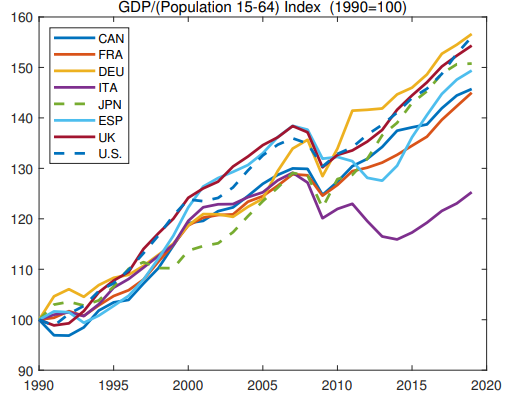

In [3]:

# Get the working-age adult population
if nu.pickle_exists('census_population_df'):
    census_population_df = nu.load_object('census_population_df')
else:
    
    # https://www.census.gov/data-tools/demo/idb/#/pop?COUNTRY_YEAR=2023&COUNTRY_YR_ANIM=2023&menu=popViz&CCODE_SINGLE=**&CCODE=US,DE,JP,FR,IT,CA,ES&popPages=BYAGE&ageGroup=BR
    file_path = '../data/csv/IDB_11-22-2023.csv'
    
    if nu.csv_exists('IDB_11-22-2023', nu.data_csv_folder): waa_df = nu.load_csv('IDB_11-22-2023', nu.data_folder)
    waa_df.columns = ['GENC', 'Country', 'Year', 'GROUP', 'Population', '% of Population', 'Male Population', '% of Males', 'Female Population', '% of Females', 'Sex ratio of the population']
    waa_df['alpha3'] = waa_df.Country.map(lambda x: ssu.country_to_alpha3_dict[x])
    
    # Create the container data frame
    census_population_df = pd.DataFrame([], columns=year_columns_list)
    
    mask_series = (waa_df.GROUP == population_group_type)
    columns_list = ['alpha3', 'Year', 'Population']
    for alpha3, alpha3_df in waa_df[mask_series][columns_list].groupby('alpha3'):
        df = alpha3_df.drop(columns=['alpha3']).rename(columns={'Population': alpha3, 'Year': 'alpha3'}).set_index('alpha3').T
        census_population_df = pd.concat([census_population_df, df], axis='index')
    for cn in census_population_df.columns: census_population_df[cn] = pd.to_numeric(census_population_df[cn], errors='coerce', downcast='integer')
    census_population_df = census_population_df.interpolate(axis='columns', limit_direction='both')
    census_population_df = census_population_df.convert_dtypes()
    nu.store_objects(census_population_df=census_population_df)
display(census_population_df.T)

,CAN,DEU,ESP,FRA,ITA,JPN,USA
1990,19087500,55002566,26418050,38368226,38988991,86044677,164229455
1991,19087500,55002566,26418050,38513171,38988991,86473991,165924186
1992,19333485,55336622,26628642,38662914,39110556,86793571,167953322
1993,19571416,55608770,26816283,38812282,39197909,87011028,169920143
1994,19809379,55688965,26977198,38950832,39225745,87083272,171992191
1995,20046727,55783606,27101763,39100583,39195720,87069313,174237364
1996,20277316,55919473,27192150,39262714,39164571,86977303,176547324
1997,20493326,55994254,27286580,39427413,39125568,86837093,179157964
1998,20705196,56000444,27399050,39578312,39071061,86701884,181754513
1999,20940556,55953791,27556052,39726703,39002435,86532165,184286959


In [4]:

if nu.pickle_exists('imf_gdp_df'): imf_gdp_df = nu.load_object('imf_gdp_df')
else:
    if nu.pickle_exists('imf_datamapper_df'): imf_datamapper_df = nu.load_object('imf_datamapper_df')
    else:
        import requests # Python 3.6
        
        periods_str = ','.join([str(i) for i in range(start_year, 2024)])
        indicator_type = 'NGDPD'
        url = f'https://www.imf.org/external/datamapper/api/v1/{indicator_type}?periods={periods_str}'
        
        # Navigate to series in API-returned JSON data
        value_obj = requests.get(f'{url}').json()
        rows_list = []
        for country, year_dict in value_obj['values'][indicator_type].items():
            row_dict = {'alpha3': country}
            row_dict = nu.get_flattened_dictionary(year_dict, row_dict=row_dict)
            rows_list.append(row_dict)
        columns_list = ['alpha3'] + [str(i) for i in range(start_year, 2024)]
        imf_datamapper_df = pd.DataFrame(rows_list)[columns_list]
    
    mask_series = imf_datamapper_df.alpha3.isin(alpha3s_list)
    imf_gdp_df = imf_datamapper_df[mask_series].set_index('alpha3')
    imf_gdp_df.columns = [int(cn) for cn in imf_gdp_df.columns]
    imf_gdp_df = imf_gdp_df[year_columns_list].convert_dtypes()
    
    nu.store_objects(imf_gdp_df=imf_gdp_df)
display(imf_gdp_df)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\imf_gdp_df.pkl


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
alpha3,,,,,,,,,,,,,,,,,,,,,
CAN,596.089,612.514,594.376,579.059,579.913,605.941,630.598,655.01,634.004,678.417,...,1805.751,1556.508,1527.996,1649.266,1725.3,1743.725,1647.598,2001.487,2137.939,2117.805
DEU,1598.64,1875.618,2136.312,2072.457,2209.934,2588.002,2498.113,2214.694,2242.065,2197.125,...,3890.095,3357.926,3468.896,3689.547,3976.246,3889.607,3884.615,4281.348,4085.681,4429.838
ESP,535.652,576.446,630.122,529.319,531.137,613.946,640.026,589.376,618.414,635.968,...,1372.174,1196.278,1233.215,1312.782,1422.347,1394.474,1277.106,1446.613,1418.916,1582.054
FRA,1272.433,1273.594,1404.391,1324.236,1396.653,1602.13,1606.035,1454.555,1505.184,1494.634,...,2856.701,2439.436,2472.282,2594.235,2792.223,2729.171,2645.3,2958.431,2780.136,3049.016
ITA,1162.272,1227.727,1302.796,1047.616,1080.544,1175.278,1312.783,1243.228,1271.701,1253.69,...,2162.567,1836.824,1876.554,1961.104,2092.881,2011.525,1895.693,2115.762,2012.014,2186.082
JPN,3196.556,3657.348,3988.334,4544.766,4998.798,5545.566,4923.393,4492.449,4098.363,4635.982,...,4896.995,4444.931,5003.678,4930.837,5040.881,5117.995,5050.683,5011.869,4237.528,4230.862
USA,5963.125,6158.125,6520.325,6858.55,7287.25,7639.75,8073.125,8577.55,9062.825,9631.175,...,17550.675,18206.025,18695.1,19477.35,20533.075,21380.95,21060.45,23315.075,25462.725,26949.643


In [5]:

def show_index_plot(df, verbose=False):
    
    # Create line plot
    fig, ax = plt.subplots(figsize=(10, 6))
    for alpha3, row_series in df.iterrows():
        values_list = row_series.values.tolist()
        v1990 = values_list[0]
        values_list = [(v - v1990) for v in values_list]
        if verbose: print(values_list)
        years_list = [int(n) for n in row_series.index]
        ax.plot(years_list, values_list, label=alpha3)
    
    # Label the axes
    ax.set_xlabel('Year')

    # Make y tick labels look like the picture above
    yticklabels_list = []
    for text_obj in ax.get_yticklabels():
        text_obj.set_text(100+int(float(text_obj.get_text().replace('−', '-')))*5)
        yticklabels_list.append(text_obj)
    ax.set_yticklabels(yticklabels_list)
    
    # Make x axis ticks and labels only show at 5 year intervals
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))
    
    # Add title
    ax.set_title(f'GDP/(Population {population_group_type}) Index ({start_year}=100)')
    
    # Add legend
    ax.legend()
    
    # Show the plot
    plt.show()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
alpha3,,,,,,,,,,,,,,,,,,,,,
CAN,0.000031,0.000032,0.000031,0.00003,0.000029,0.00003,0.000031,0.000032,0.000031,0.000032,...,0.000075,0.000064,0.000063,0.000068,0.000071,0.000071,0.000067,0.000082,0.000087,0.000086
DEU,0.000029,0.000034,0.000039,0.000037,0.00004,0.000046,0.000045,0.00004,0.00004,0.000039,...,0.000072,0.000062,0.000063,0.000067,0.000073,0.000071,0.000072,0.00008,0.000076,0.000084
ESP,0.00002,0.000022,0.000024,0.00002,0.00002,0.000023,0.000024,0.000022,0.000023,0.000023,...,0.000045,0.000039,0.00004,0.000043,0.000046,0.000045,0.000041,0.000046,0.000045,0.000051
FRA,0.000033,0.000033,0.000036,0.000034,0.000036,0.000041,0.000041,0.000037,0.000038,0.000038,...,0.000068,0.000059,0.000059,0.000062,0.000067,0.000066,0.000064,0.000071,0.000067,0.000073
ITA,0.00003,0.000031,0.000033,0.000027,0.000028,0.00003,0.000034,0.000032,0.000033,0.000032,...,0.000054,0.000046,0.000047,0.000049,0.000053,0.000051,0.000048,0.000053,0.000051,0.000055
JPN,0.000037,0.000042,0.000046,0.000052,0.000057,0.000064,0.000057,0.000052,0.000047,0.000054,...,0.000063,0.000058,0.000066,0.000066,0.000068,0.000069,0.000069,0.000069,0.000058,0.000058
USA,0.000036,0.000037,0.000039,0.00004,0.000042,0.000044,0.000046,0.000048,0.00005,0.000052,...,0.000083,0.000086,0.000088,0.000091,0.000096,0.0001,0.000097,0.000108,0.000118,0.000125


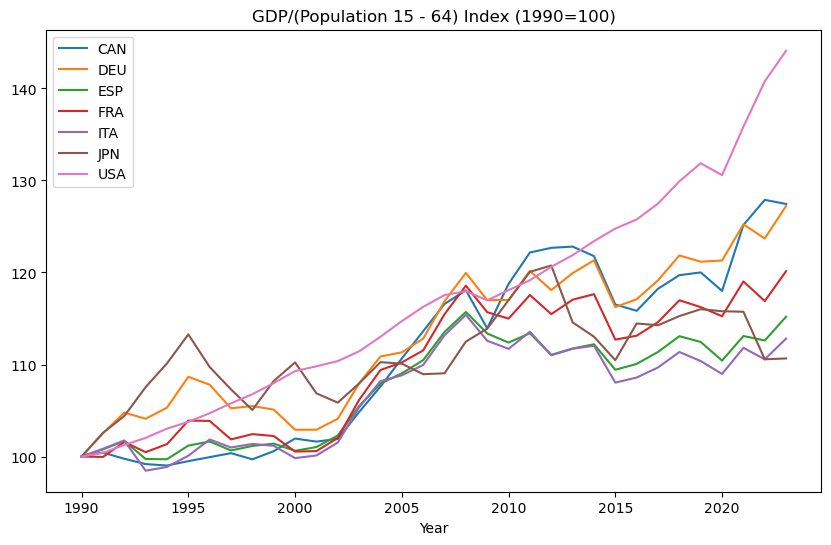

In [6]:

gdp_by_waa_df = imf_gdp_df[year_columns_list] / census_population_df[year_columns_list]
display(gdp_by_waa_df)
show_index_plot(gdp_by_waa_df)